In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Importing the dataset

In [2]:
df_data_or = pd.read_csv('OnlineRetailData.csv',sep=",", encoding="ISO-8859-1", header=0)
df_data_or.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df_data_or.shape

(541909, 8)

In [4]:
df_data_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


2
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


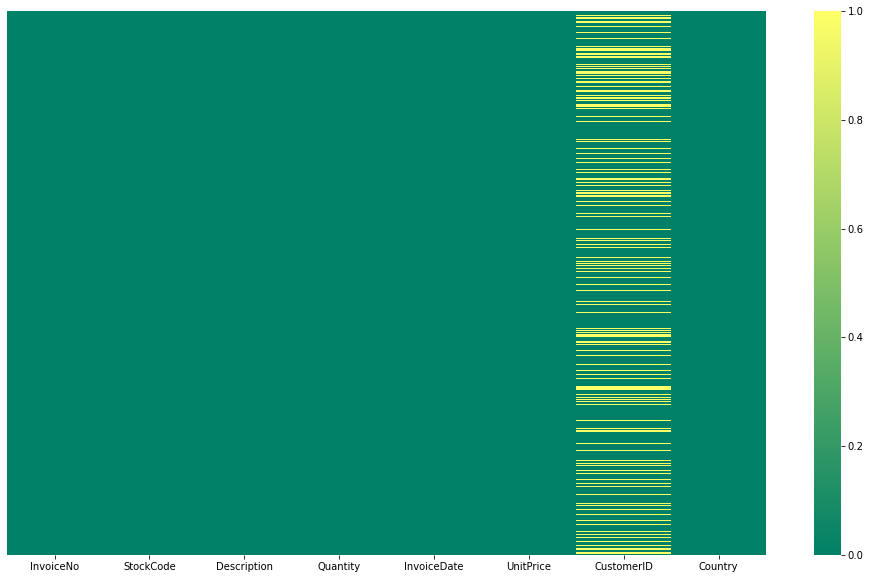

In [5]:
print(df_data_or.isnull().any().sum())
print(df_data_or.isnull().sum())
plt.figure(figsize=(17, 10))
sns.heatmap(df_data_or.isnull(), yticklabels=False, cmap='summer')
plt.show()

Quite some null values in `CustomerID` column, but we are not concerned with it as we already have `invoiceID` to work with 

In [6]:
df_data_or = df_data_or.dropna()
df_data_or.shape

(406829, 8)

In [7]:
df_data_or_null = df_data_or.isnull().sum()
df_data_or_null.shape

(8,)

In [8]:
df_data_or_null

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df_data_or.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


So far we are good to proceed 

#### Working on Datetime

In [10]:
df_data_or['InvoiceDate'] = pd.to_datetime(df_data_or["InvoiceDate"], format='%d-%m-%Y %H:%M')

In [11]:
df_data_or.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Analysing the statistics of date 

In [12]:
max_date = max(df_data_or['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [13]:
min_date = min(df_data_or['InvoiceDate'])
min_date

Timestamp('2010-12-01 08:26:00')

Finding how long they had been customers to the firm 

In [15]:
df_data_or['Difference'] = max_date - df_data_or['InvoiceDate']
df_data_or

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0 days 00:00:00


In [16]:
df_data_or.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Difference     0
dtype: int64

In [17]:
recfremon_r = df_data_or.groupby('CustomerID')['Difference'].min()
recfremon_r

CustomerID
12346.0   325 days 02:33:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
                 ...       
18280.0   277 days 02:58:00
18281.0   180 days 01:57:00
18282.0     7 days 01:07:00
18283.0     3 days 00:48:00
18287.0    42 days 03:21:00
Name: Difference, Length: 4372, dtype: timedelta64[ns]

In [18]:
recfremon_r = recfremon_r.reset_index()
print(recfremon_r.shape)
recfremon_r.head(10)

(4372, 2)


,CustomerID,Difference
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
5,12352.0,35 days 22:13:00
6,12353.0,203 days 19:03:00
7,12354.0,231 days 23:39:00
8,12355.0,213 days 23:01:00
9,12356.0,22 days 04:10:00


In [19]:
recfremon_r['Difference'] = recfremon_r['Difference'].dt.days
recfremon_r.head(10)

,CustomerID,Difference
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
5,12352.0,35
6,12353.0,203
7,12354.0,231
8,12355.0,213
9,12356.0,22


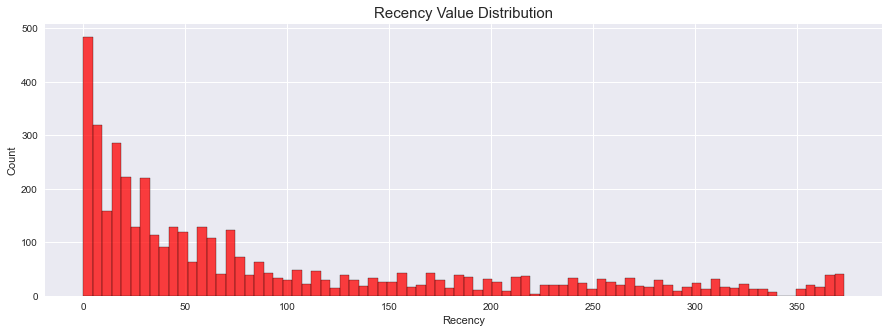

In [20]:
plt.style.use('seaborn')
plt.subplots(figsize=(15, 5))
sns.histplot(recfremon_r.groupby('CustomerID')['Difference'].max(), kde=False, bins=80, color = 'red')
plt.title('Recency Value Distribution', fontsize = 15)
plt.xlabel('Recency')
plt.ylabel('Count');

In [21]:
recfremon_f = df_data_or.groupby('CustomerID')['InvoiceNo'].count()
recfremon_f = recfremon_f.reset_index()
recfremon_f.columns = ['CustomerID', 'Frequency']
recfremon_f.head(10)

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,95
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


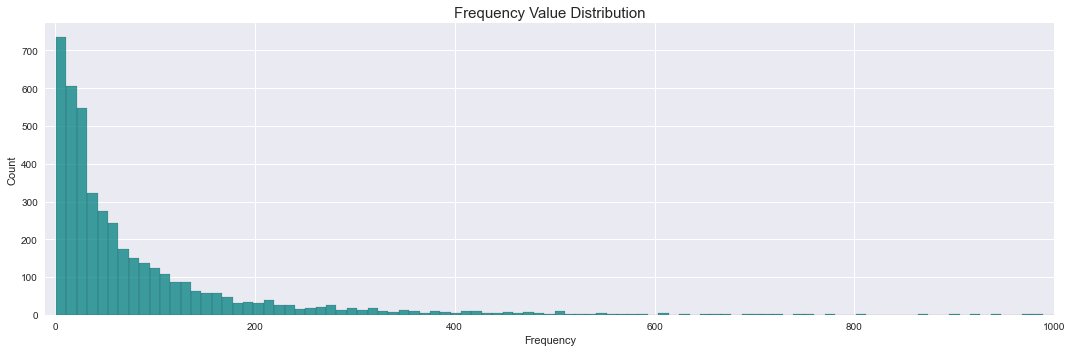

In [22]:
plt.figure(figsize=(15, 5))
sns.histplot(recfremon_f.groupby('CustomerID')['Frequency'].max(), kde=False, bins='auto', color = 'teal' )
plt.title('Frequency Value Distribution', fontsize = 15)
plt.xlim(-10, 1000)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.tight_layout()

In [23]:
recfremon = pd.merge(recfremon_r, recfremon_f, on='CustomerID', how='inner')
recfremon.head(10)

,CustomerID,Difference,Frequency
0,12346.0,325,2
1,12347.0,1,182
2,12348.0,74,31
3,12349.0,18,73
4,12350.0,309,17
5,12352.0,35,95
6,12353.0,203,4
7,12354.0,231,58
8,12355.0,213,13
9,12356.0,22,59


In [24]:
df_data_or['Amount'] = df_data_or['UnitPrice']*df_data_or['Quantity']
recfremon_m = df_data_or.groupby('CustomerID')['Amount'].sum()
recfremon_m = recfremon_m.reset_index()
recfremon_m.head(10)

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
5,12352.0,1545.41
6,12353.0,89.00
7,12354.0,1079.40
8,12355.0,459.40
9,12356.0,2811.43


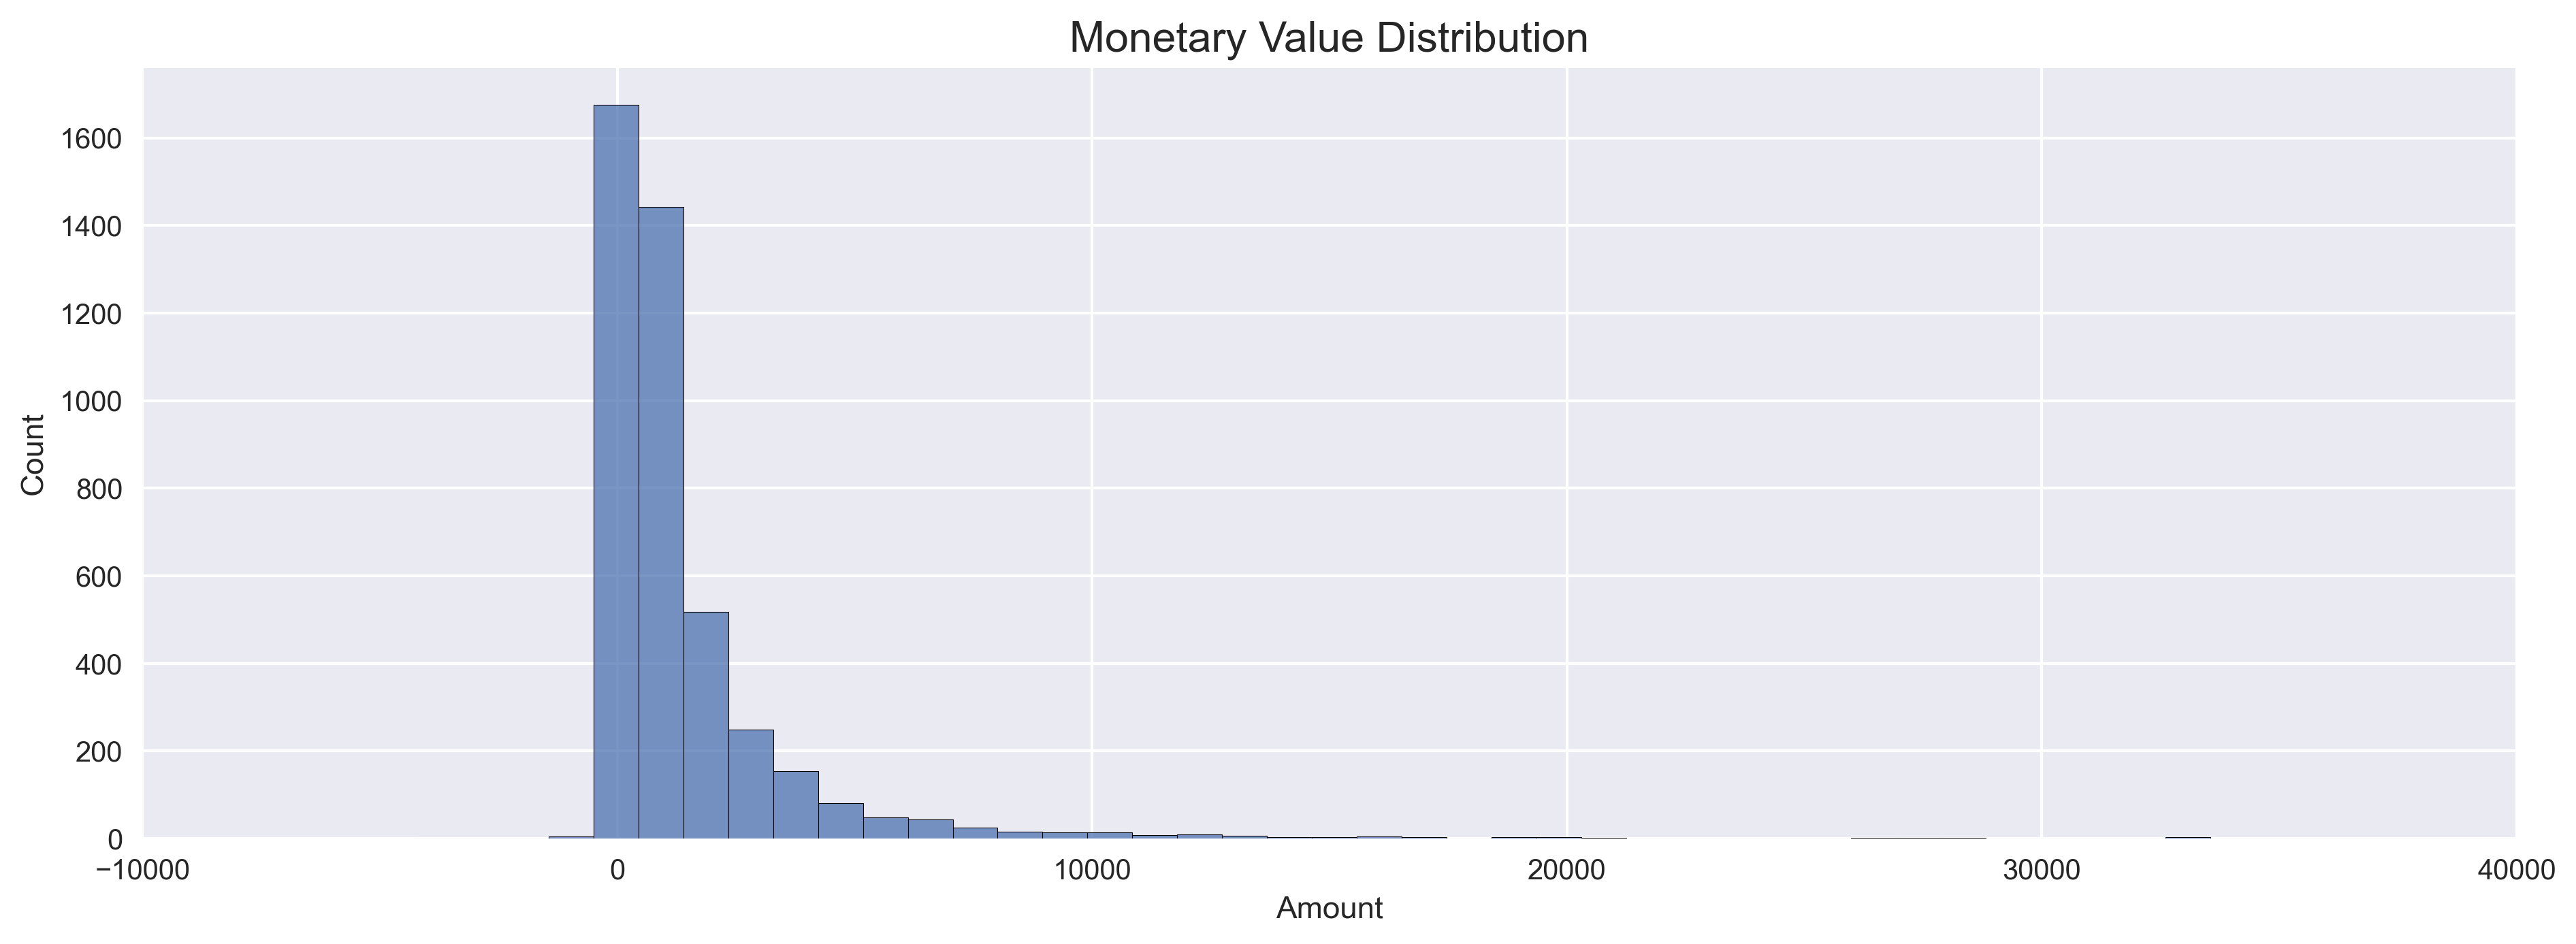

In [25]:
plt.subplots(figsize=(15, 5), dpi=300)
sns.histplot(recfremon_m.groupby('CustomerID')['Amount'].max(), kde=False, bins=300)
plt.title('Monetary Value Distribution', fontsize = 15)
plt.xlim(-10000, 40000)
plt.xlabel('Amount')
plt.ylabel('Count');

In [26]:
recfremon.columns

Index(['CustomerID', 'Difference', 'Frequency'], dtype='object')

In [34]:
recfremon.describe()

,CustomerID,Difference,Frequency
count,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.047118,93.053294
std,1722.390705,100.765435,232.471608
min,12346.000000,0.000000,1.000000
25%,13812.750000,16.000000,17.000000
50%,15300.500000,49.000000,42.000000
75%,16778.250000,142.000000,102.000000
max,18287.000000,373.000000,7983.000000


In [35]:
# recfremon.drop("Amount", axis=1, inplace = True
# recfremon = recfremon.drop(["Amount_x", "Amount_y"], axis=1)
recfremon.head()

,CustomerID,Difference,Frequency
0,12346.0,325,2
1,12347.0,1,182
2,12348.0,74,31
3,12349.0,18,73
4,12350.0,309,17


In [36]:
recfremon_m.head(4)

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55


We are renaming `differnce` column into `recency` to fit the phraseology 

In [37]:
recfremon = pd.merge(recfremon, recfremon_m, on='CustomerID', how='inner')
recfremon.columns = ['CustomerID', 'Recency', 'Frequency', 'Amount']
recfremon.head(10)

,CustomerID,Recency,Frequency,Amount
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
5,12352.0,35,95,1545.41
6,12353.0,203,4,89.00
7,12354.0,231,58,1079.40
8,12355.0,213,13,459.40
9,12356.0,22,59,2811.43


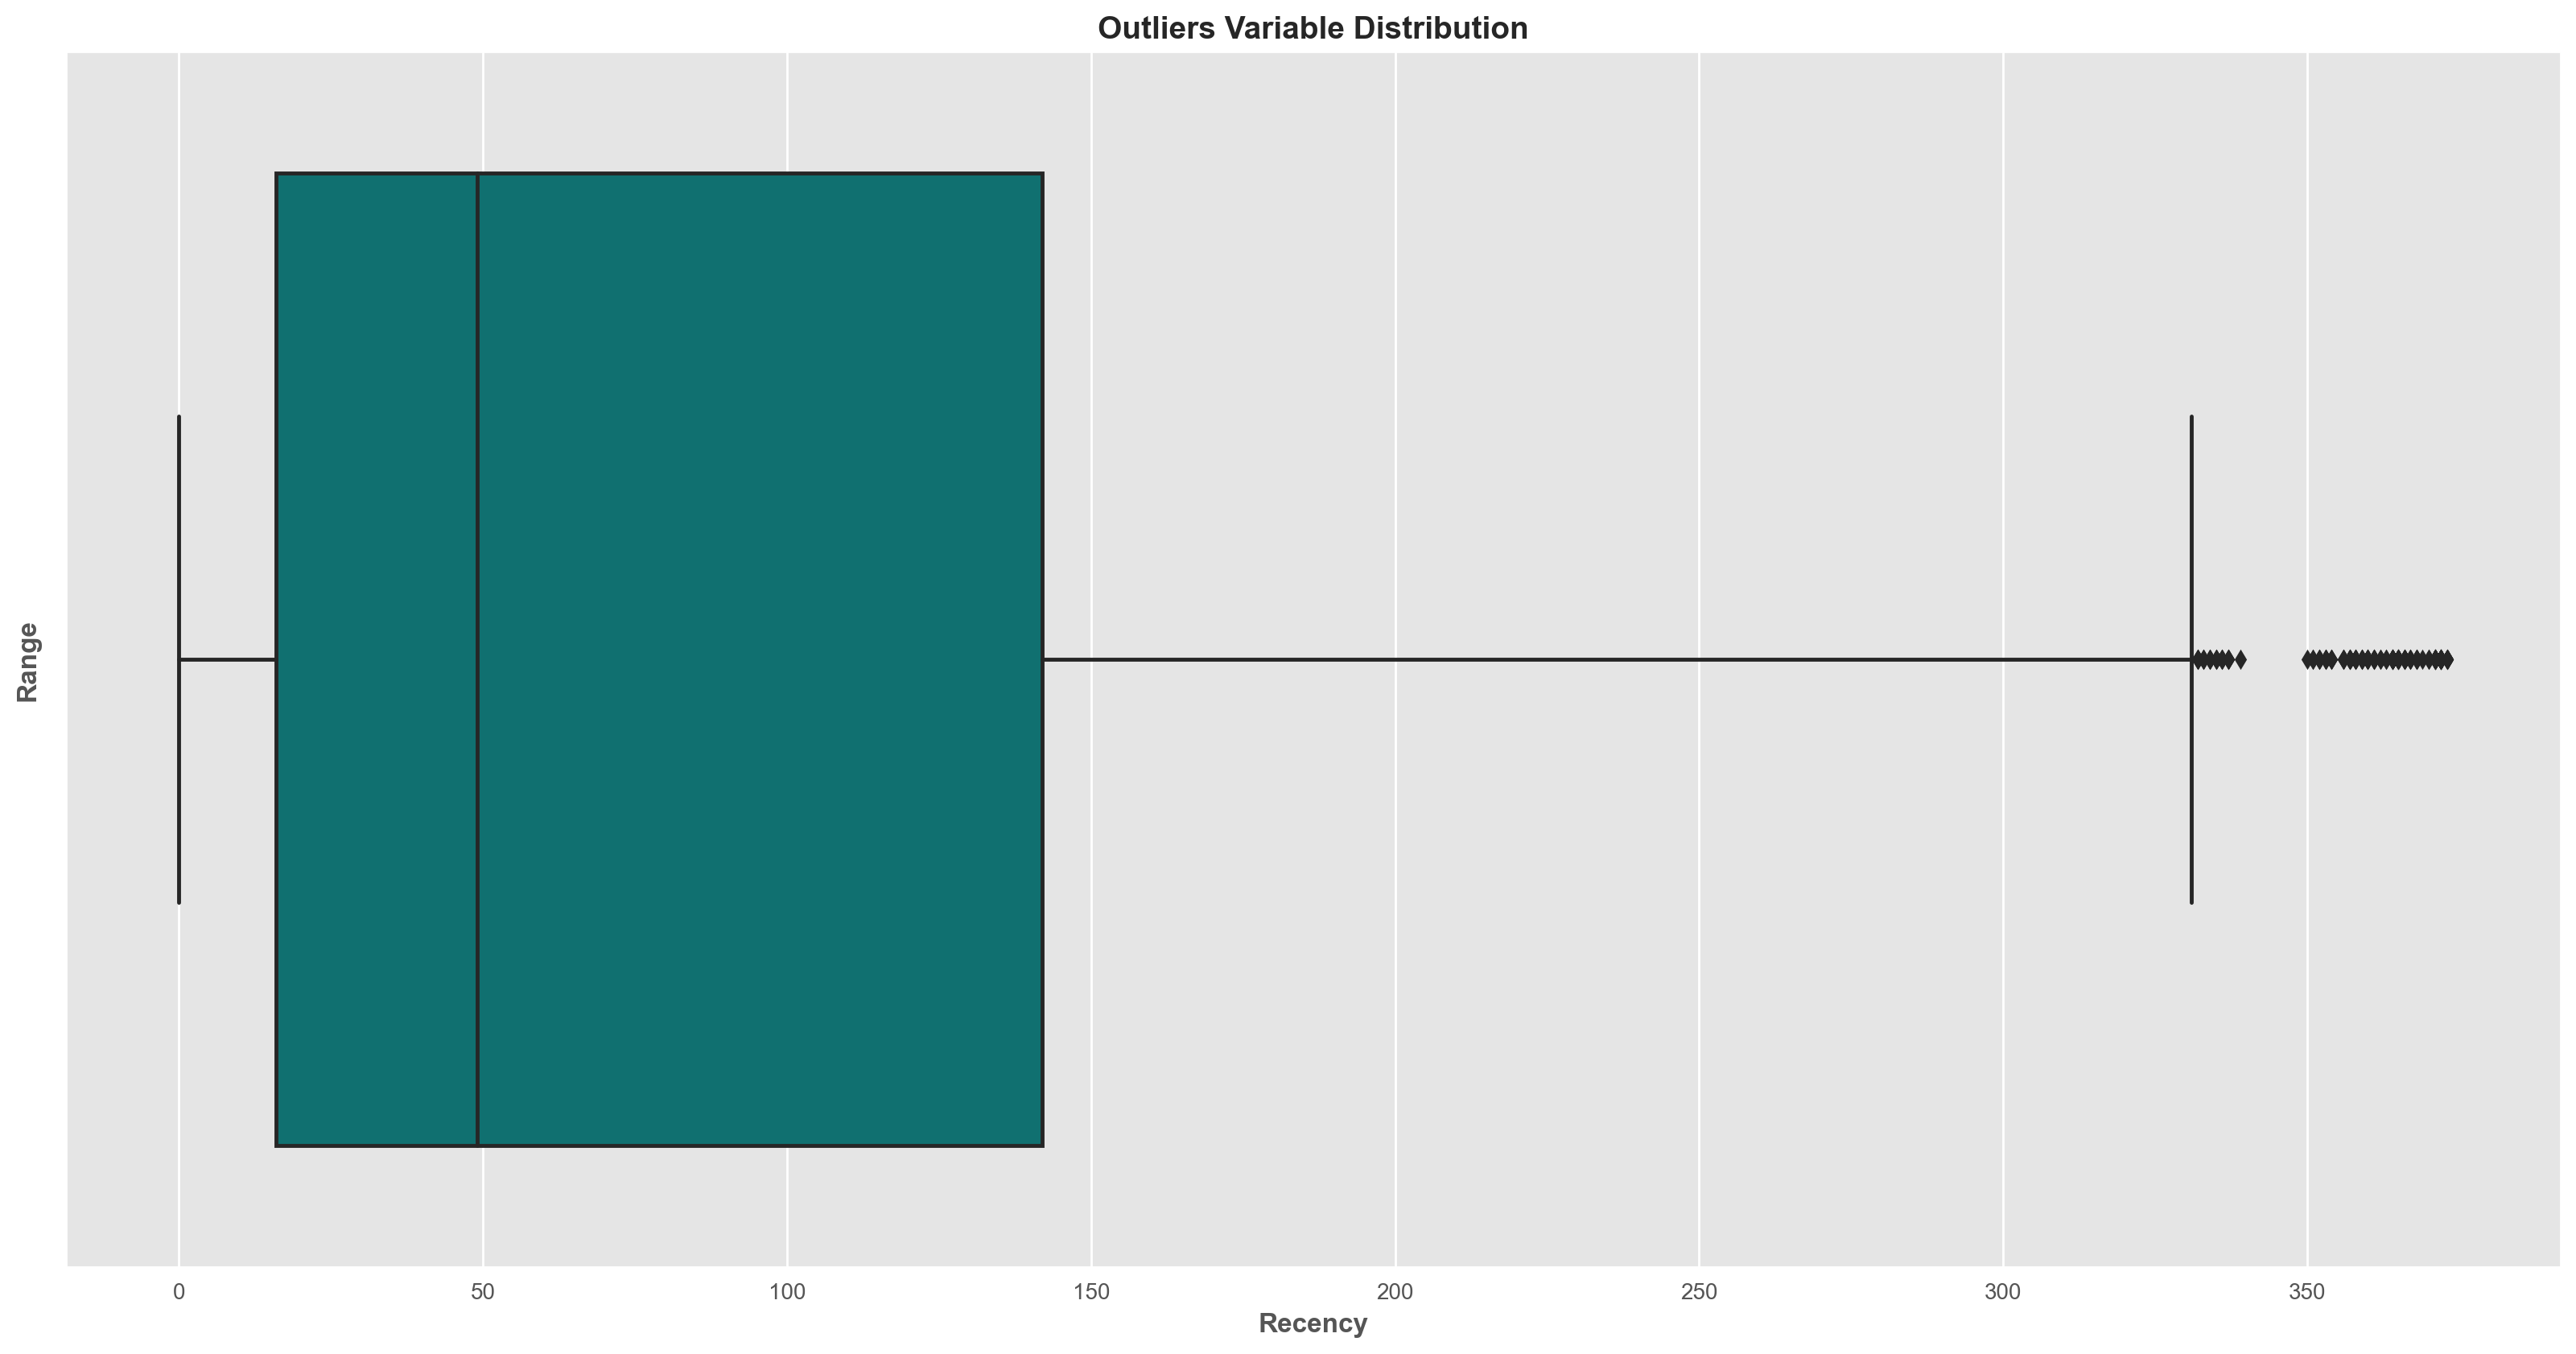

In [40]:
plt.figure(figsize=(20,10), dpi=200)
sns.boxplot(data = recfremon,x = 'Recency', color='teal')
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Recency", fontweight = 'bold')
plt.show()

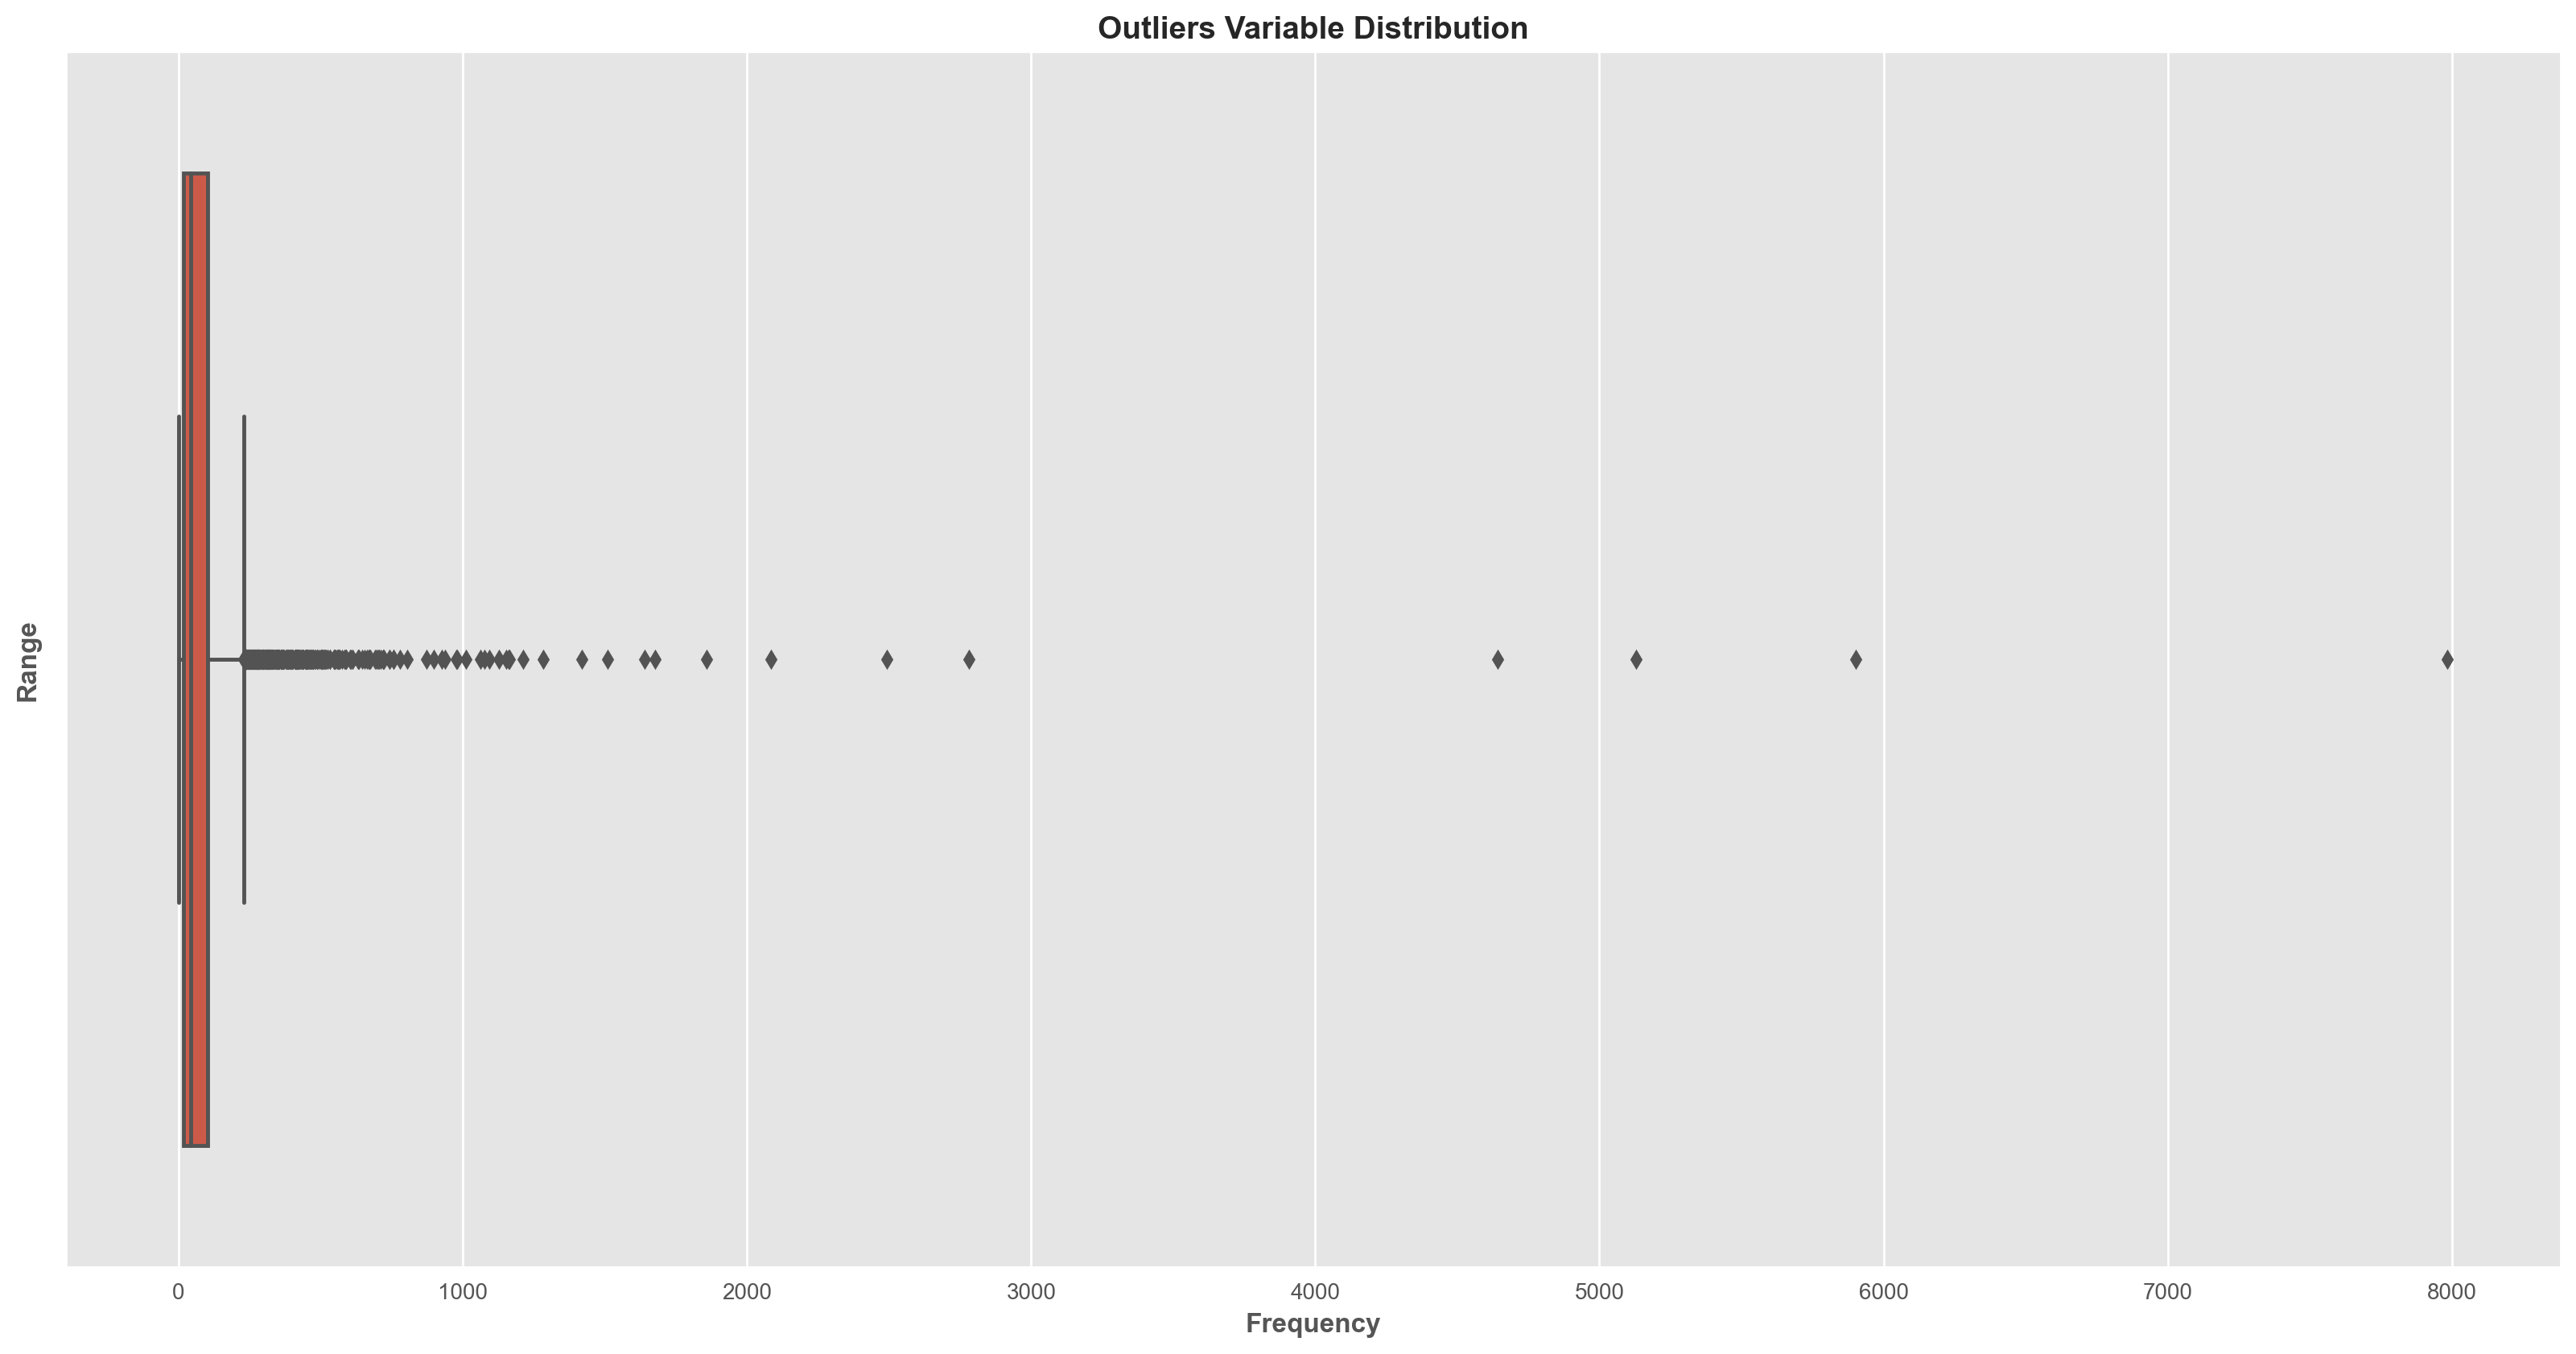

In [41]:
plt.figure(figsize=(20,10), dpi=200)
sns.boxplot(data = recfremon, x = 'Frequency')
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Frequency", fontweight = 'bold')
plt.show()

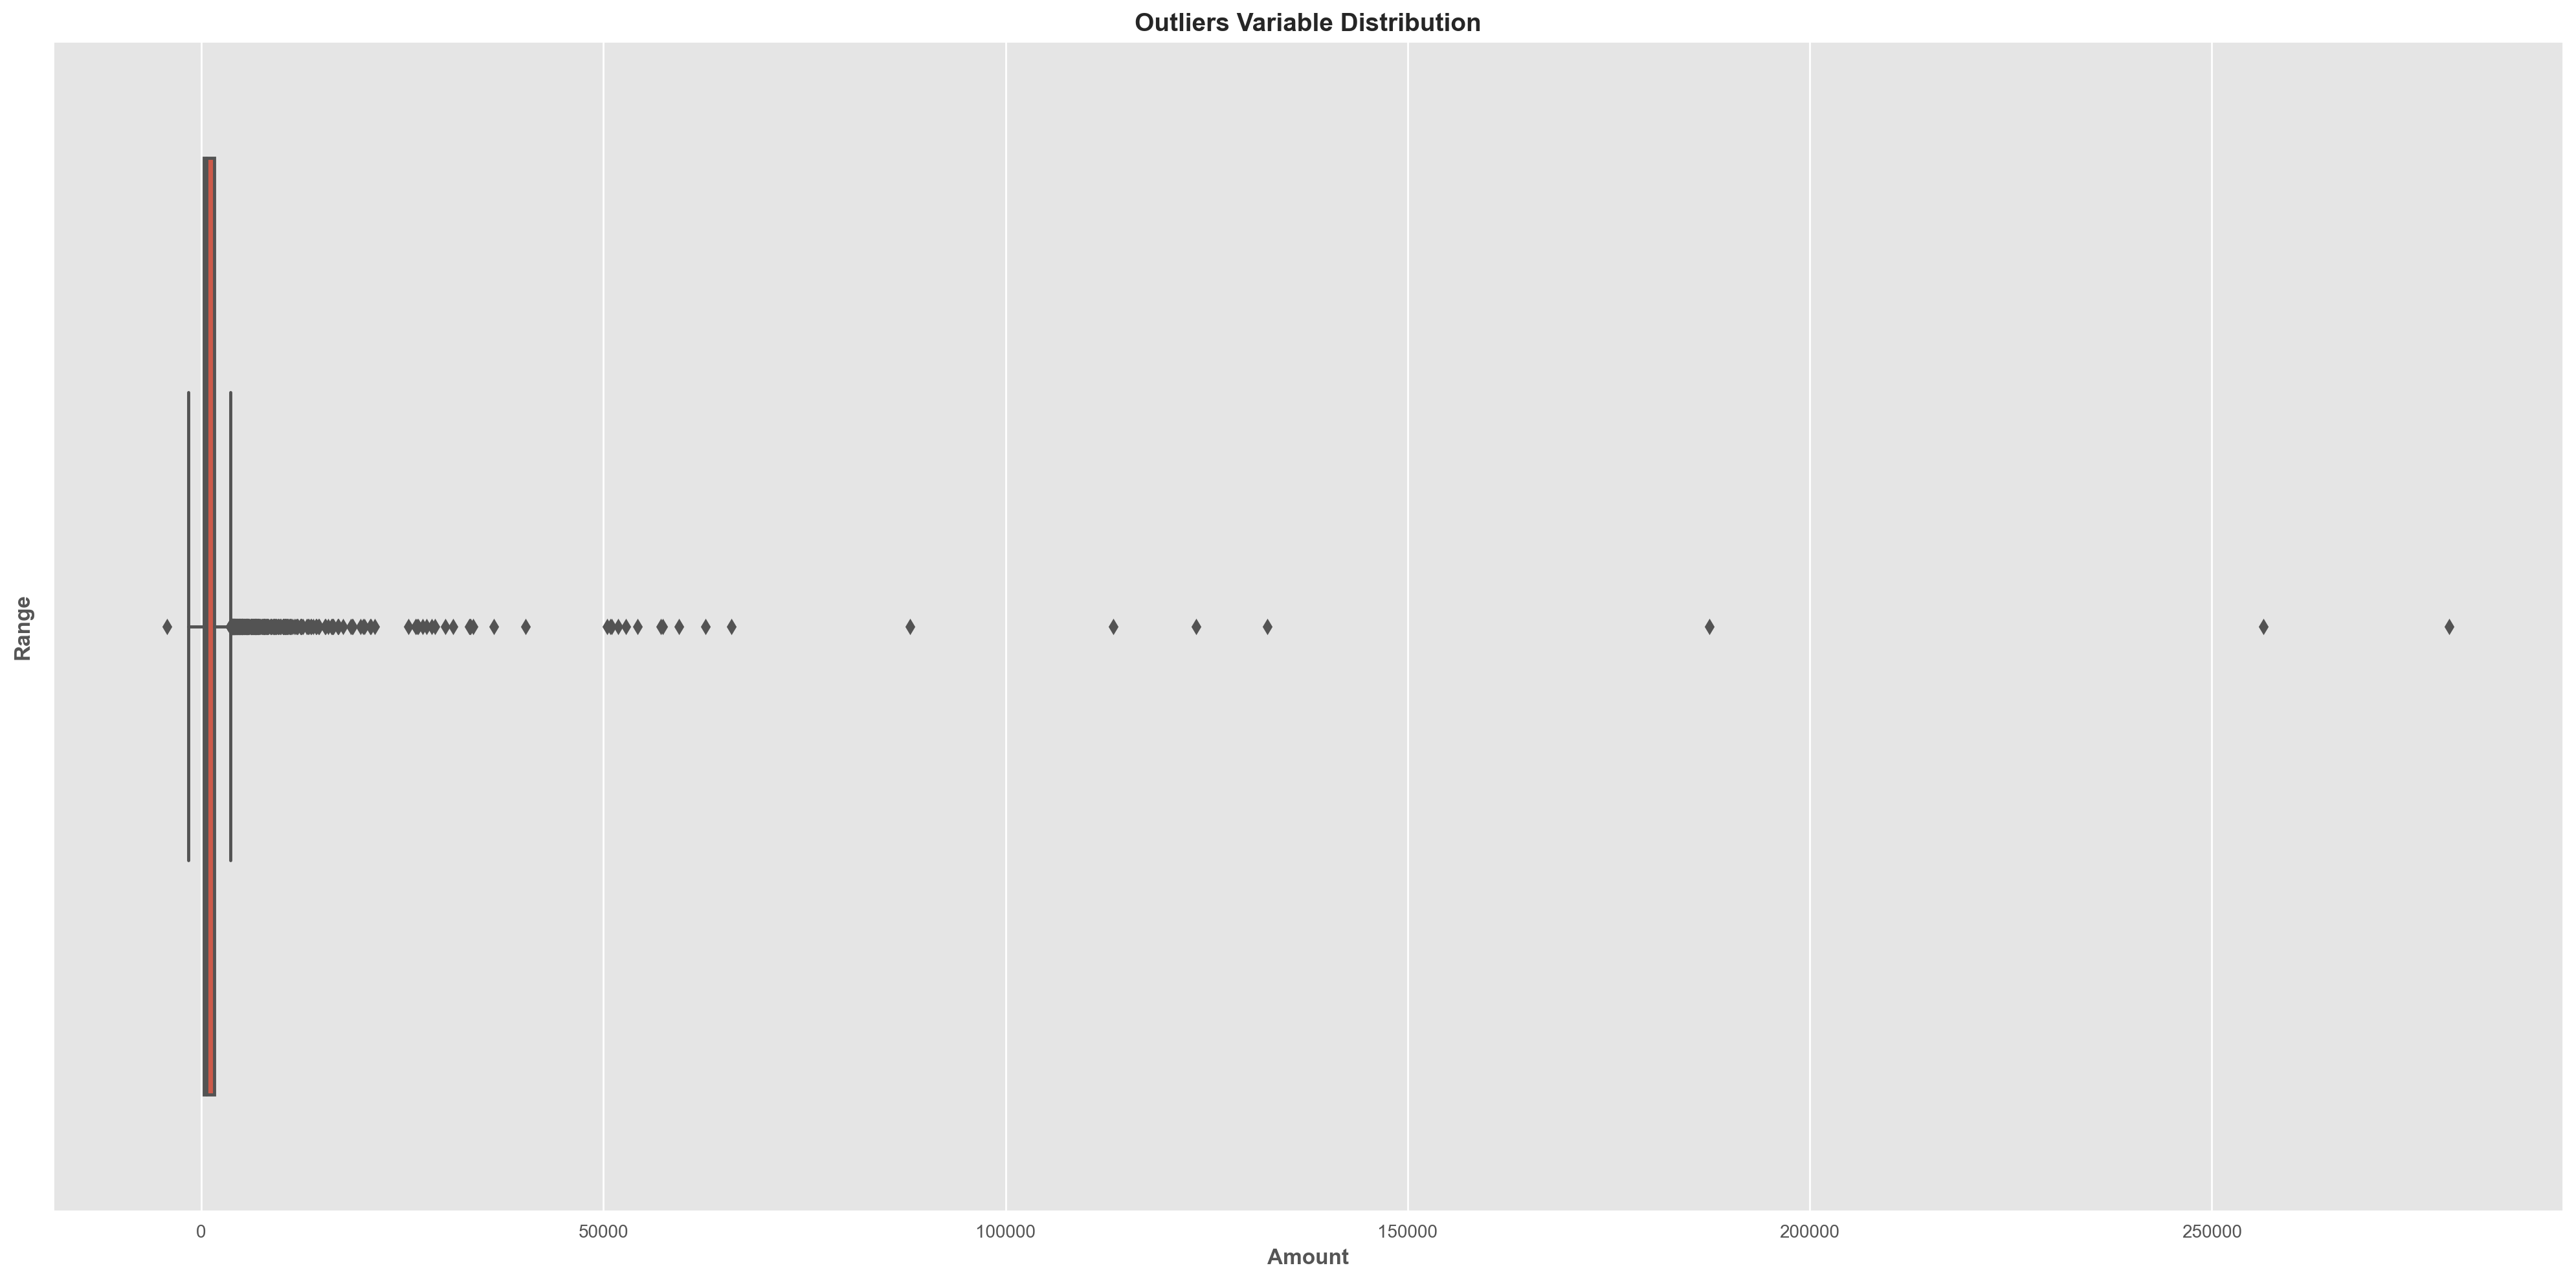

In [42]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10), dpi=200)
sns.boxplot(data = recfremon, x = 'Amount')
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Amount", fontweight = 'bold')
plt.tight_layout()

### <font color = 'aqua'> Treatment of Outliers 
It is a common practice to remove all the entries past $ 3\sigma $ as outliers or equaivalently $ \pm 1.5 *  \text{IQR}$.
<br> We are going to employ the same in here to treat our outliers

> ###  Outliers in Recency distribution

In [44]:
Q1 = recfremon.Recency.quantile(0.05)
Q3 = recfremon.Recency.quantile(0.95)
IQR = Q3 - Q1
recfremon = recfremon[(recfremon.Recency >= Q1 - 1.5*IQR) & (recfremon.Recency <= Q3 + 1.5*IQR)]
recfremon.shape

(4372, 4)

> ### Outliers in Frequeny Purchase distribution

In [45]:
Q1 = recfremon.Frequency.quantile(0.05)
Q3 = recfremon.Frequency.quantile(0.95)
IQR = Q3 - Q1
recfremon = recfremon[(recfremon.Frequency >= Q1 - 1.5*IQR) & (recfremon.Frequency <= Q3 + 1.5*IQR)]
recfremon.shape

(4343, 4)

> ### Outliers in Amount distribution

In [46]:
Q1 = recfremon.Amount.quantile(0.05)
Q3 = recfremon.Amount.quantile(0.95)
IQR = Q3 - Q1
recfremon = recfremon[(recfremon.Amount >= Q1 - 1.5*IQR) & (recfremon.Amount <= Q3 + 1.5*IQR)]
recfremon.shape

(4290, 4)

   We see that after oultiers treatments on `Amount, Frequency, Regency`, we in total dropped `82 rows`. 
   <br> Our dataset is now preprocess and ready for ML algortihms 

> ### Scaling of attributes

In [53]:
recfremon_df = recfremon[['Recency', 'Frequency', 'Amount']]
scale = StandardScaler()

recfremon_df_scaled = scale.fit_transform(recfremon_df)
recfremon_df_scaled[:3]

array([[ 2.3007653 , -0.74987222, -0.73883491],
       [-0.90690322,  1.0412316 ,  1.79662655],
       [-0.18418778, -0.46130549,  0.31843487]])

In [54]:
recfremon_df_scaled.shape

(4290, 3)

    Reverting it back to DataFrame with columns names same as above 

In [56]:
recfremon_df_scaled = pd.DataFrame(recfremon_df_scaled, columns= ['Recency', 'Frequency', 'Amount'])
recfremon_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4290 entries, 0 to 4289
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4290 non-null   float64
 1   Frequency  4290 non-null   float64
 2   Amount     4290 non-null   float64
dtypes: float64(3)
memory usage: 100.7 KB


In [58]:
recfremon_df_scaled.head()

,Recency,Frequency,Amount
0,2.300765,-0.749872,-0.738835
1,-0.906903,1.041232,1.796627
2,-0.184188,-0.461305,0.318435
3,-0.738600,-0.043381,0.295086
4,2.142362,-0.600614,-0.542116


### <font color = 'orange'> KMeans Clustering 

In [59]:
km = KMeans(n_clusters=4, max_iter=50)

In [ ]:
km.fit(recfremon_df_scaled)

In [ ]:
kmeans.labels_

In [ ]:
recfremon['Cluster_Id'] = kmeans.labels_
recfremon.head()

In [ ]:
sns.boxplot(x='Cluster_Id', y='Recency', data=recfremon)

In [ ]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=recfremon)

In [ ]:
sns.boxplot(x='Cluster_Id', y='Amount', data=recfremon)

In [ ]:
mergings = linkage(recfremon_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

In [ ]:
recfremon['Cluster_Labels'] = cluster_labels
recfremon.head()

In [ ]:
sns.boxplot(x='Cluster_Labels', y='Recency', data=recfremon)

In [ ]:
sns.boxplot(x='Cluster_Labels', y='Frequency', data=recfremon)

In [ ]:
sns.boxplot(x='Cluster_Labels', y='Amount', data=recfremon)